##Teaching Assistant Evaluation Model

***Sources***

(a) Collector: Wei-Yin Loh (Department of Statistics, UW-Madison)

(b) Donor:     Tjen-Sien Lim (limt@stat.wisc.edu)

(c) Date:      June 7, 1997

***Attribute Information:***

   1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

***Relevant Information:***

The data consist of evaluations of teaching performance over three
regular semesters and two summer semesters of 151 teaching assistant
(TA) assignments at the Statistics Department of the University of
Wisconsin-Madison. The scores were divided into 3 roughly equal-sized
categories ("low", "medium", and "high") to form the class variable.






##Pre-Work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
df = pd.read_fwf('/content/tae.data')
df.head() 

,"1,23,3,1,19,3"
0,"2,15,3,1,17,3"
1,"1,23,3,2,49,3"
2,"1,5,2,2,33,3"
3,"2,7,11,2,55,3"
4,"2,23,3,1,20,3"


## Data Cleaning and Preprocessing

In [3]:
df[['Native Speaker','Course Instructor','Course','Summer or Regular','Class Size', 
    'Class Attribute']] = df['1,23,3,1,19,3'].str.split(',', expand=True) #split the single column into 6 columns, separated by commas
df.drop('1,23,3,1,19,3', axis=1, inplace=True) #Drop Redundant/Original Column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Native Speaker     150 non-null    object
 1   Course Instructor  150 non-null    object
 2   Course             150 non-null    object
 3   Summer or Regular  150 non-null    object
 4   Class Size         150 non-null    object
 5   Class Attribute    150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [4]:
df = df.astype(int) #convert data types to int
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Native Speaker     150 non-null    int64
 1   Course Instructor  150 non-null    int64
 2   Course             150 non-null    int64
 3   Summer or Regular  150 non-null    int64
 4   Class Size         150 non-null    int64
 5   Class Attribute    150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [5]:
df.head()

,Native Speaker,Course Instructor,Course,Summer or Regular,Class Size,Class Attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


##Visualization

---



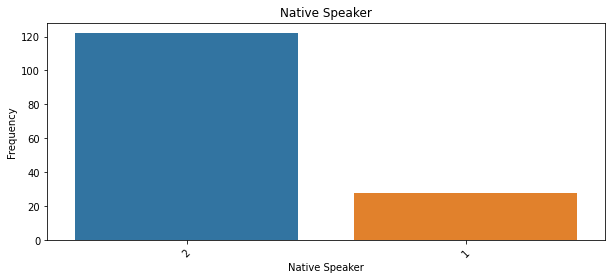

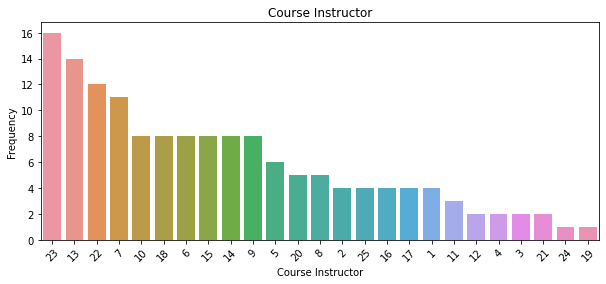

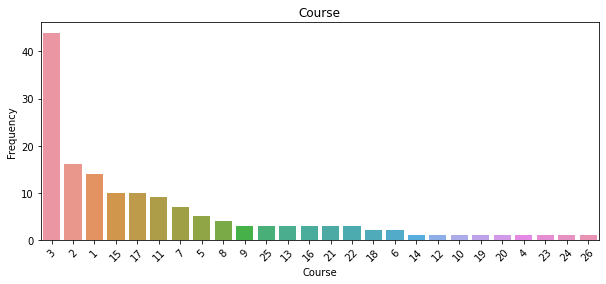

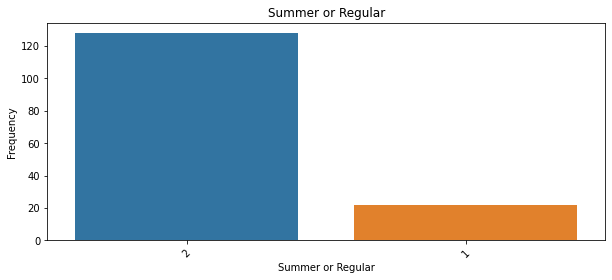

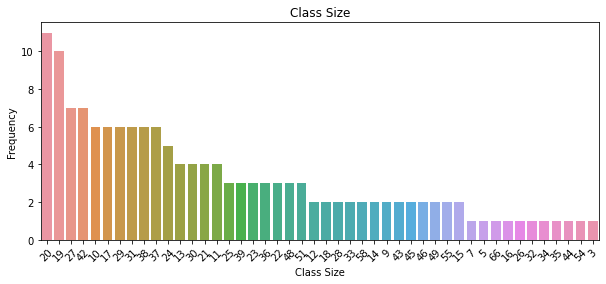

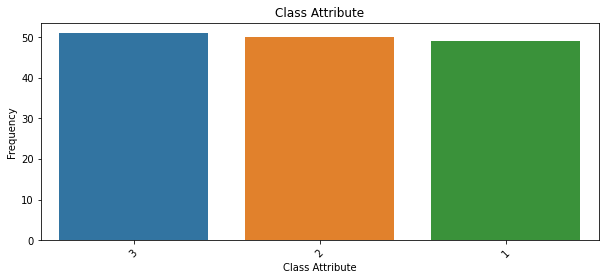

In [6]:
def count_and_plot(feature):

    # get feature
    feat = df[feature]
    
    #visualization
    plt.figure(figsize=(10,4))
    sns.countplot(x=feat, order=feat.value_counts().index)
    plt.xticks(rotation=45) #Rotates X Features for Readability
    plt.ylabel("Frequency") 
    plt.title(feature)
    plt.show()

for i in df:
  count_and_plot(i)

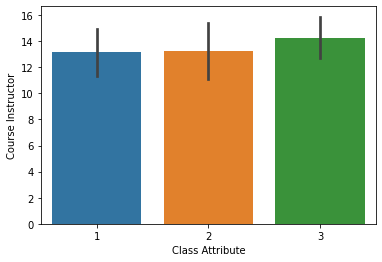

In [7]:
sns.barplot(x=df['Class Attribute'],y=df['Course Instructor'])

##Feature Selection/Engineering

In [8]:
#Univariate Selection (Feature Selection)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['Native Speaker',	'Course Instructor',	'Course',	'Summer or Regular',	'Class Size']]
y = df['Class Attribute']

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print the 5 best features

               Specs      Score
2             Course  80.618037
4         Class Size  11.489503
1  Course Instructor   2.746977
0     Native Speaker   0.921068
3  Summer or Regular   0.765164


[0.05546065 0.24036113 0.25662713 0.05119364 0.39635745]


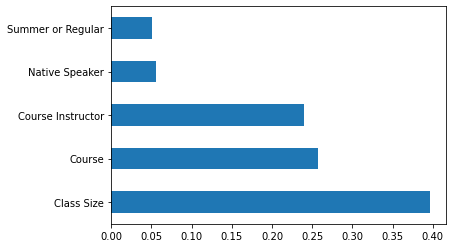

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<Figure size 1440x1440 with 0 Axes>

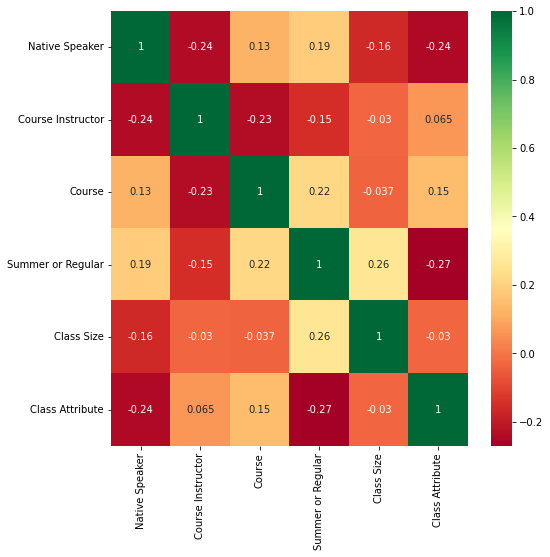

In [10]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
fig, ax = plt.subplots(figsize=(8,8))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Using a Decision Tree Classifier Model

In [148]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = df[['Native Speaker',	'Course Instructor',	'Course',	'Summer or Regular',	'Class Size']]
y = df['Class Attribute']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [149]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
model.score(X_test,y_test)

0.6666666666666666

In [151]:
df.head()

,Native Speaker,Course Instructor,Course,Summer or Regular,Class Size,Class Attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [152]:
model.predict([[2,15,3,1,17]]) #Using the first row of the data set to show model prediction

array([3])

#Using a Logistic Regression Model

In [137]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,train_size=0.9)

In [138]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [139]:
model2.fit(X_test2,y_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
model2.score(X_test2,y_test2)

0.6